<a href="https://colab.research.google.com/github/haishan-shi/A1/blob/master/A2_Practical_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Machine learning is applied in many fields all over the world. It is getting more and more popular in Healthcare Industry. Machine learning is more likely to playing a crucial role in predicting heart diseases and other incurable diseases. If predicted well in advance in these diseases, prediction information can provide doctors with significant and detailed insights, and then they can adjust the basis of their diagnosis and treatment for each patient.

In this report, it will discuss a project in which machine learning algorithms are used to predict patients' potential heart disease. The algorithm includes K-Neighborhood Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. The data set is downloaded from Kaggle, which is used to predict patients' potential heart disease and analyse the probability of heart disease between male and female.

# Expoloration

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


**Import data set**

My first dataset has been downloaded from Kaggle, and I saved it as a local csv file named heart.csv. Next, I used uploaded local csv file to read the first dataset and save it to the heart variable.

In [2]:

#load data 
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "heart.csv" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "heart.csv" with length 38114 bytes


In [0]:
heart = pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


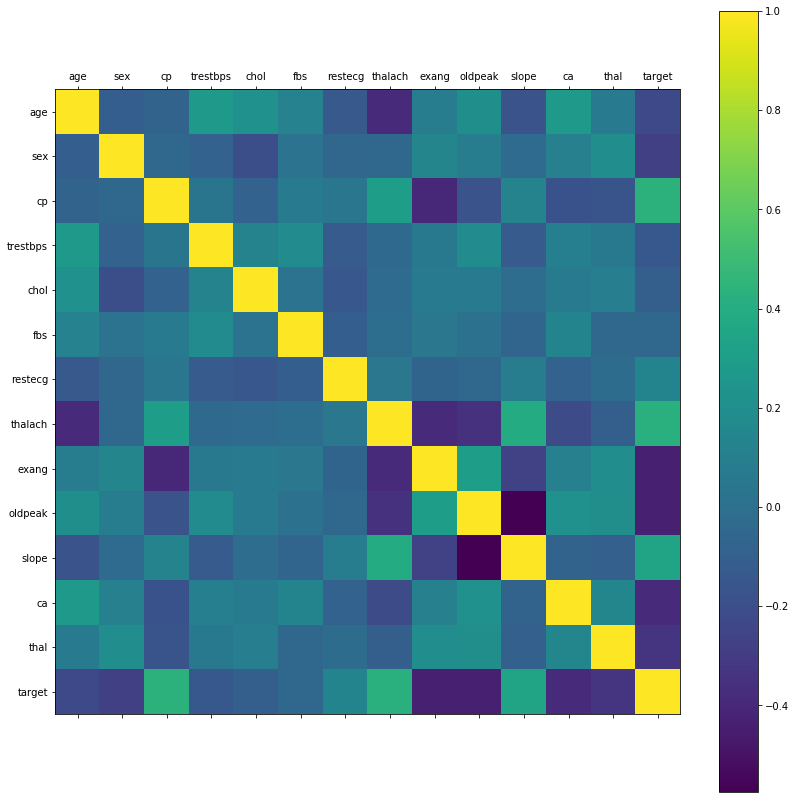

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(heart.corr())
plt.yticks(np.arange(heart.shape[1]), heart.columns)
plt.xticks(np.arange(heart.shape[1]), heart.columns)
plt.colorbar()

**Correlation Matrix**

It can be seen that there is no single feature with a very high correlation related to our target value. Also, features with the target value are showing   negative and positive correlation.

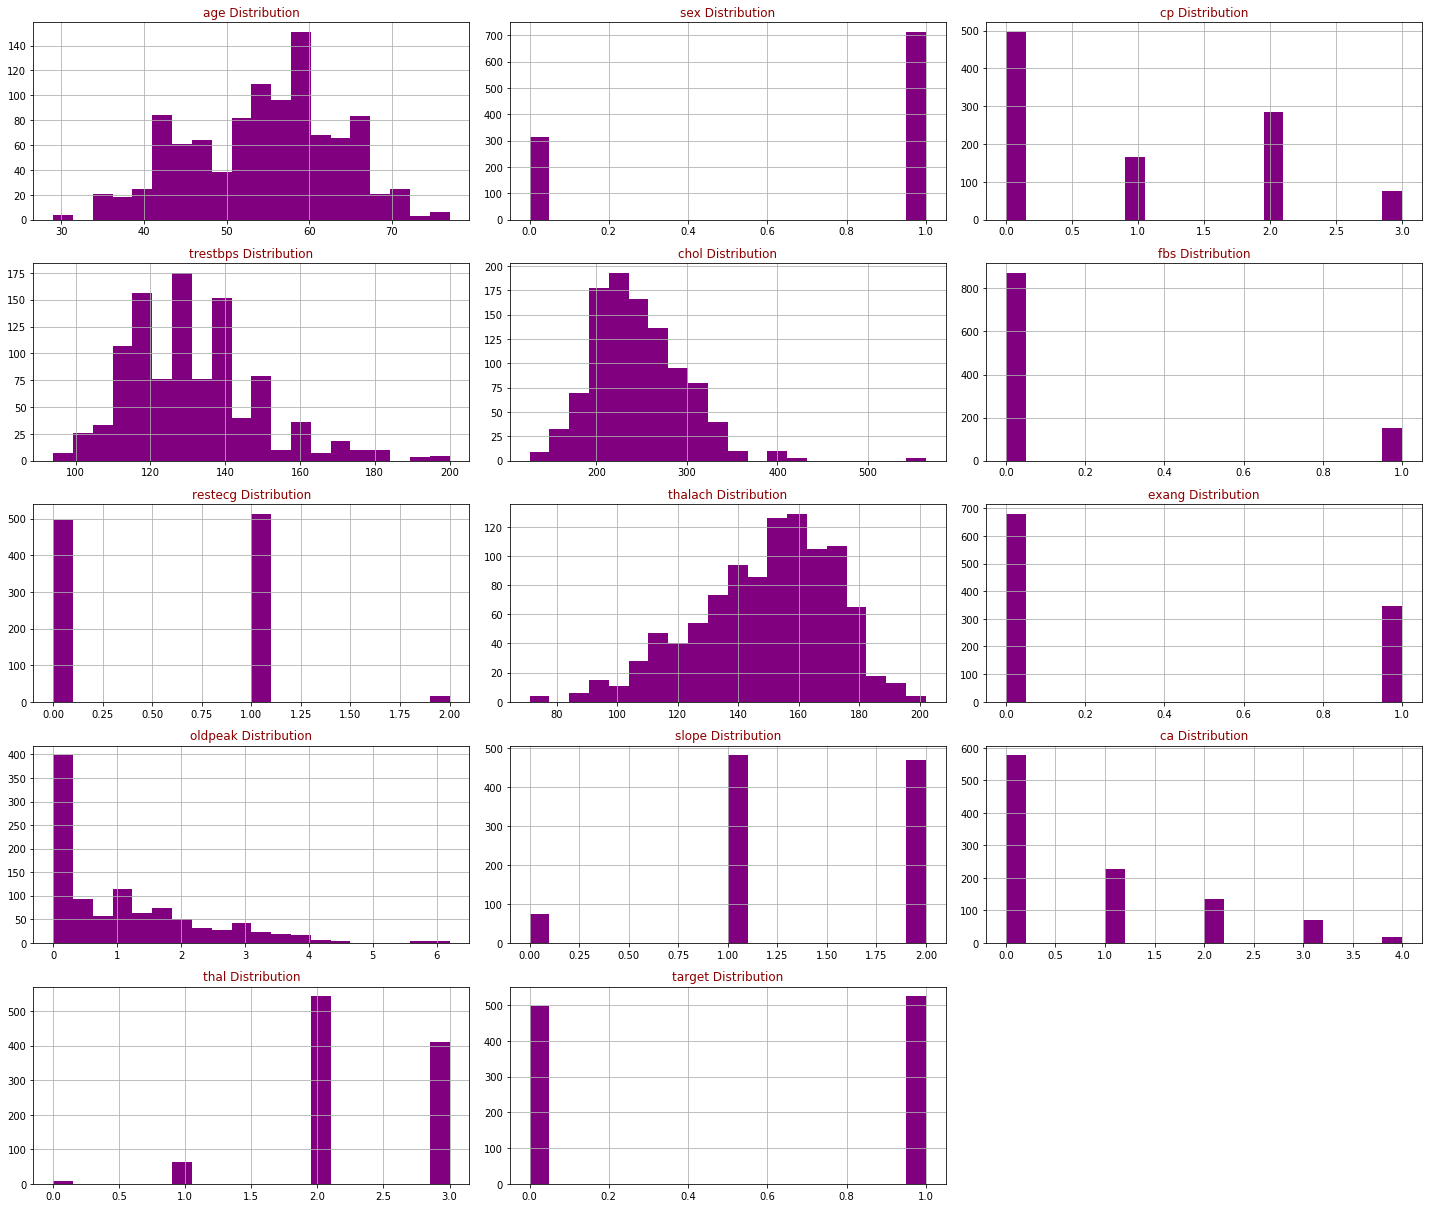

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='purple')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)

**Histograms Distribution**

1. As these histograms shown, it can be seen how each feature and label are distributed with different ranges, which highly defines the essentials of scaling. In addition, each categorized variable is described by each discrete bar. 
2. Column target 0 for disease-free and 1 for disease.
3. Column sex 1 for Male and 0 for Female.

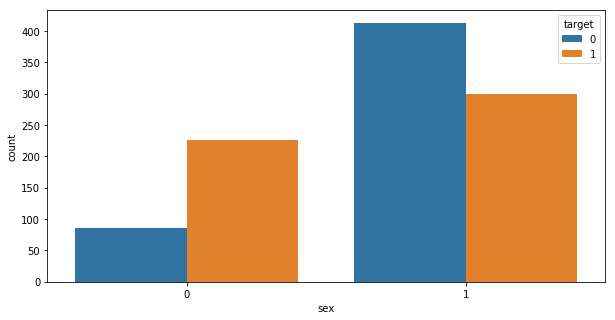

In [9]:
rcParams['figure.figsize'] = 10,5
sn.countplot(x='sex',hue='target',data=heart)

In [10]:
heart.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [11]:
heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [12]:
heart.target.value_counts()
diseased=(len(heart[heart.target==1])/len(heart.target))*100
diseased_male=len(heart[(heart.target==1) & (heart.sex==1)])/len(heart.target)*100
diseased_female=len(heart[(heart.target==1) & (heart.sex==0)])/len(heart.target)*100

print("{:.2f}% of the total count were diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(diseased,diseased_male,diseased_female))

non_diseased=(len(heart[heart.target==0])/len(heart.target))*100
non_diseased_male=len(heart[(heart.target==0) & (heart.sex==1)])/len(heart.target)*100
non_diseased_female=len(heart[(heart.target==0) & (heart.sex==0)])/len(heart.target)*100
print("\n{:.2f}% of the total count were  not diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(non_diseased,non_diseased_male,non_diseased_female))

51.32% of the total count were diseased, amoung which 29.27% were male and 22.05% were female

48.68% of the total count were  not diseased, amoung which 40.29% were male and 8.39% were female


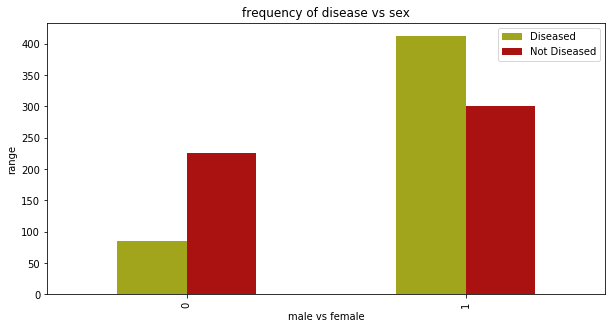

In [13]:
pd.crosstab(heart.sex, heart.target).plot(kind="bar",figsize=(10,5),color=['#a0a51c','#AA1111' ])
plt.title("frequency of disease vs sex")
plt.ylabel('range')
plt.xlabel('male vs female')
plt.legend(["Diseased","Not Diseased"])
plt.show()

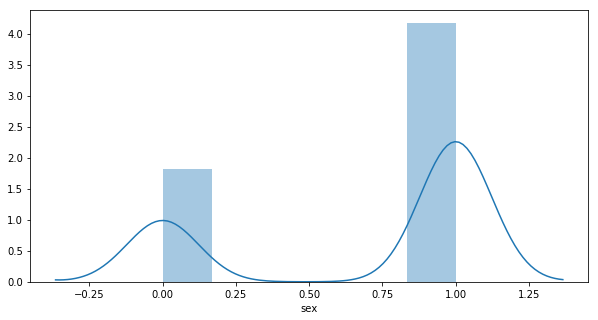

In [14]:
sn.distplot(heart["sex"])

**Result**

It is shown that : **a)** 51.32% of the total count were diseased, amoung which 29.27% were male and 22.05% were female. **b)** 48.68% of the total count were  not diseased, amoung which 40.29% were male and 8.39% were female

As a result, referenced a) and b),  male diseased is higher than female.

In [15]:
heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

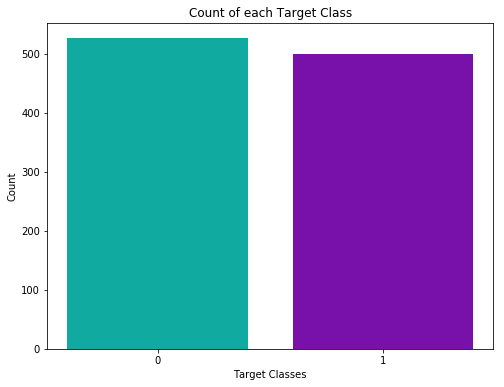

In [17]:
#For x-axis I used the unique() values from the target column and then set their
#name using xticks. For y-axis, I used value_count() to get the values for each class. 
#The bars are colored as blue and purple.

rcParams['figure.figsize'] = 8,6
plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['#11aaa0', '#7711aa'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

It can be seen that 0 value is slightly greater than 1 value. They are almost balanced, which helps continue train the data.

# Methodology

To deal with classification variables, it needs decompose each classification column into dummy columns with 1s and 0s.
Suppose we have a "sex" column with a male value of 1 and a female value of 0. It needs to be converted to two columns, with a value of 1, a value of true, a value of 0, and a value of false. Example shown as below.

In [0]:

# Original Columm
# |    sex   |
# |     1    |
# |     1    |
# |     0    |

# Dummy Columns
# |    sex_0   ||    sex_1   |
# |      0     ||      1     |
# |      0     ||      1     |
# |      1     ||      0     |

heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])


In [19]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


**Implement Algorithms**

There are 4 algorithms(K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier.) and their various parameters used and varied in this project, and final models will be compared and concluded. The dataset is split into 35% training data and 65% testing data.

In [0]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65, random_state = 0)

**K Neighbors Classifier**

The classifier finds k nearest neighbor classes of a given data point and assigns a class to the data point based on most classes. However, the number of neighbours can vary. I set them from one neighbor to 30 neighbors and trained the test scores in each case.

In [0]:
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Next, a line graph of the number of neighbors ploted and the test score achieved in each case.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

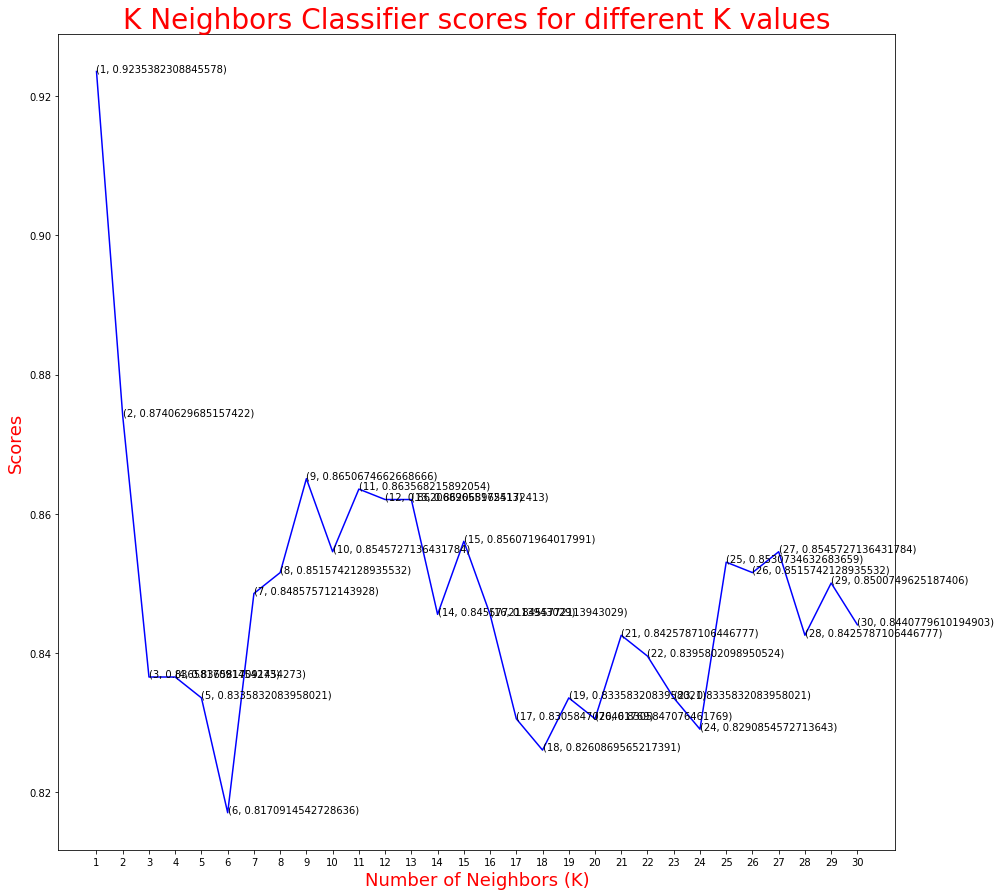

In [150]:
rcParams['figure.figsize'] = 15, 15
plt.plot([k for k in range(1, 31)], knn_scores, color = 'blue')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('K Neighbors Classifier scores for different K values', color = 'red',fontsize=28)

**Result**

As shown from the line graph, 92.35% is the maximum score, and 1 is the number of neighbors.

**Support Vector Classifier**

The goal of the classifier is defined formally by separating hyperplanes as much as possible by adjusting the distance between data points and hyperplanes. Hyperplanes are determined by four kernels including Linear, Poly, RBF, and Sigmoid.



In [0]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

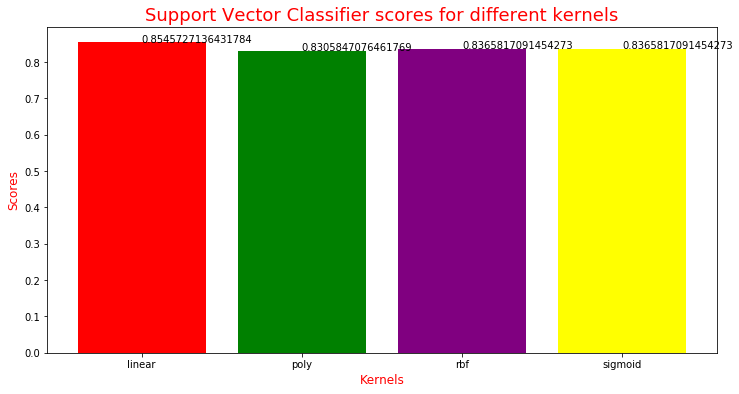

In [141]:
rcParams['figure.figsize'] = 12, 6
plt.bar(kernels, svc_scores, color = ['red', 'green', 'purple', 'yellow'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels', color = 'red', fontsize=12)
plt.ylabel('Scores', color = 'red', fontsize=12)
plt.title('Support Vector Classifier scores for different kernels', color = 'red', fontsize=18)

**Result**

From the bar chart above, it can be seen that the four kernels are almost balanced, but 85.46% in the linear kernel performed the best score for this dataset.

**Decision Tree Classifier**

The decision tree establishes a classification or regression model in the form of tree structure. It decomposes a data set into smaller and smaller subsets, while a related decision tree is developed incrementally.The range of features defined from 1 to 30. 

In [0]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

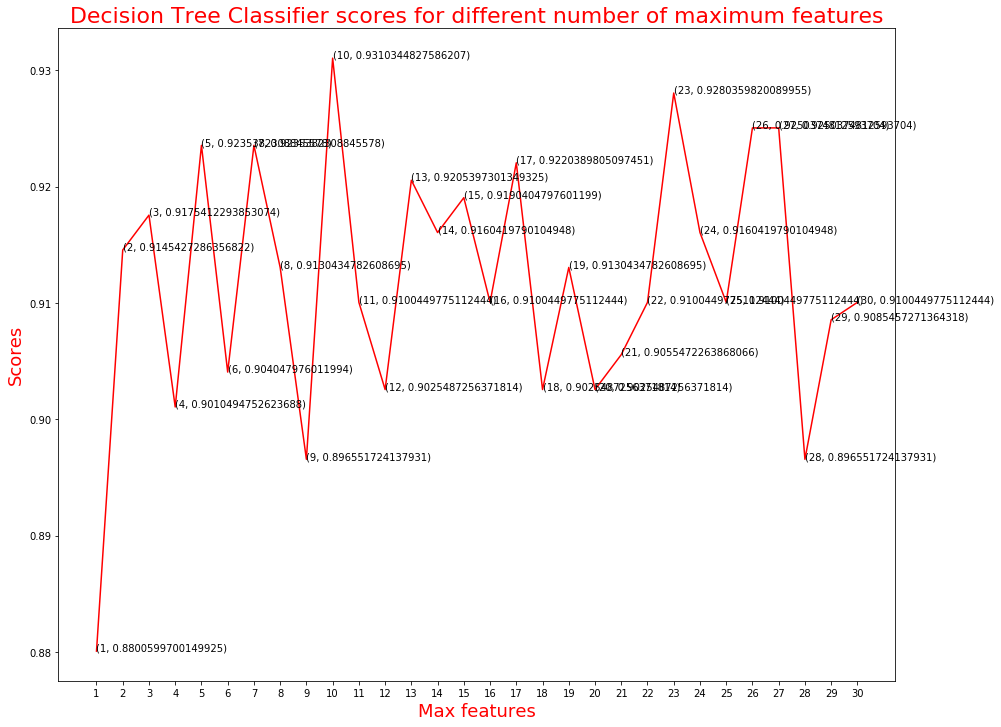

In [154]:
rcParams['figure.figsize'] = 15, 12
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('Decision Tree Classifier scores for different number of maximum features', color = 'red', fontsize=22)

**Result**

From the line graph above, it is clearly shown that 93.1% is the maximum score  while 10 is the maximum feature ranged from 1 to 30.

**Random Forest Classifier**

This classifier consists of a large number of individual decision trees, which operates as a whole. Every tree in a random forest will spit out a class prediction, and the class with the most votes will be the prediction of our model. The number of trees will be varied to predict the class assigned test scores into 10, 50, 150, 300 and 500 trees.

In [0]:
rf_scores = []
estimators = [10, 50, 150, 300, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

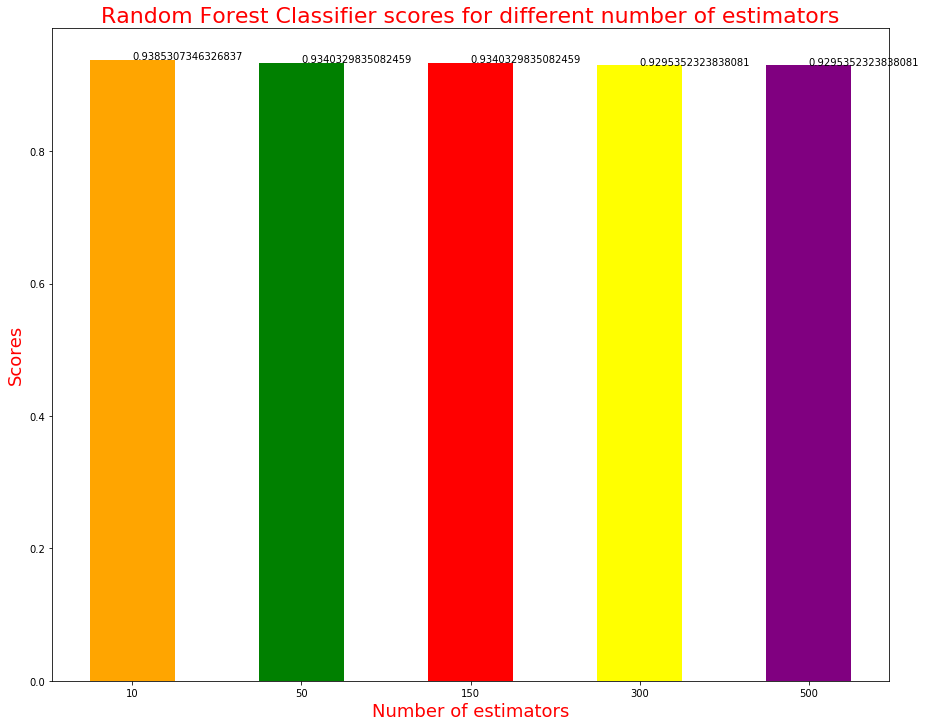

In [155]:
rcParams['figure.figsize'] = 15, 12
plt.bar([i for i in range(len(estimators))], rf_scores, color = ['orange', 'green', 'red', 'yellow', 'purple'], width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('Random Forest Classifier scores for different number of estimators', color = 'red', fontsize=22)

**Result**

As shown the bar graph above, it can be clearly seen that the five assigned samples are slightly balanced, which are over 90%, however, the maximum score of 93.85% was achieved for 10 trees.

# Conclusion

In conclusion, the project has been predicted the heart disease patient dataset with proper data processing, and there are 4 algorithms trained and tested with maximum scores as follows:
K Neighbors Classifier: 92.35%
Support Vector Classifier: 85.46%
Decision Tree Classifier: 93.1%
Random Forest Classifier: 93.85%
Therefore, it is shown that Random Forest Classifier is the best score of 93.85% for 10 trees. However, K Neighbors Classifier and Decision Tree Classifier are also higher accuracy of 92.35% with 1 neightbour and 93.1% with 10 features.

Also, four machine learning algorithms are used to predict heart disease based on patients'dataset. The most effective classifiers for predicting heart disease are Random Forest Classifier, followed by Decision Tree Classifier and K Neighbors Classifier. According to the training model, each classifier has its own advantages in the convenience and accuracy of model prediction. Although not the most effective model, the results of Decision Tree Classifier are easier to read and interpret. 

# Ethical

1. Many important and useful algorithms are free to use and download, which is a good thing. But if some people or organisations have a patent algorithm, the law makes it illegal to use the same algorithm. What if the right algorithm can help millions of people? Can a person's view of right and wrong be used to reverse engineering algorithms for the benefit of others? This involves intellectual property theft, but it is still a concern of ml. A problem in developing new algorithms is closely related to data sets. If you don't have a complete data set (that is, you have a data set that can't accurately integrate a large number of possible scenarios), then it may happen that your resulting ml system becomes biased and it may start to identify.